<a href="https://colab.research.google.com/github/DanielDekhtyar/AI-Accelerator/blob/main/Module%207%20-%20Machine%20Learning/AI_drowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
#create the data

###יצירת תת קבוצה:  קוים
#מספר נק' בתת קבוצה
n_points = 200
thickness = 0.05  # העובי של הקווים
exclusion_radius = 0.07  # רדיוס בטיחות - מונע חפיפה של הרעש על האותיות

# פונקציה להוספת רעש (עובי) לנקודות
def add_noise(points, scale=thickness):
    return points + np.random.normal(scale=scale, size=points.shape)

# עם שני אלכסונים וקו אופקי
a_left = np.column_stack((np.linspace(-0.6, 0, n_points), np.linspace(-1, 1, n_points)))  # קו שמאלי
a_right = np.column_stack((np.linspace(0.6, 0, n_points), np.linspace(-1, 1, n_points)))   # קו ימני
a_middle = np.column_stack((np.linspace(-0.3, 0.3, int(n_points/2)), np.full(int(n_points/2), 0)))  # קו אופקי

#קו אנכי
i_body = np.column_stack((np.full(n_points, 0.8), np.linspace(-1, 1, n_points)))  # קו אנכי

# הוספת רעש
a_left = add_noise(a_left)
a_right = add_noise(a_right)
a_middle = add_noise(a_middle)
i_body = add_noise(i_body)

# איחוד הקבוצה
X_AI = np.vstack((a_left, a_right, a_middle, i_body))
y_AI = np.ones(X_AI.shape[0])  # כל הנקודות באותיות יקבלו תווית 1

# יצירת רעש רנדומלי והפרדת חפיפה בין קבוצת קוווים לקבוצת רקע
n_noise = 800
X_noise = []
while len(X_noise) < n_noise:
    candidate = np.random.rand(1, 2) * 2 - 1  # נקודה רנדומלית בטווח [-1,1]x[-1,1]
    distances = np.linalg.norm(X_AI - candidate, axis=1)  # חישוב מרחק מכל נקודה אדומה
    if np.all(distances > exclusion_radius):  # אם הנקודה רחוקה מספיק, נוסיף אותה
        X_noise.append(candidate[0])

X_noise = np.array(X_noise)
y_noise = np.zeros(X_noise.shape[0])  # כל נקודות הרקע יקבלו תווית 0

# שילוב הדאטה – אותיות + רעש
X = np.vstack((X_AI, X_noise))
y = np.hstack((y_AI, y_noise))

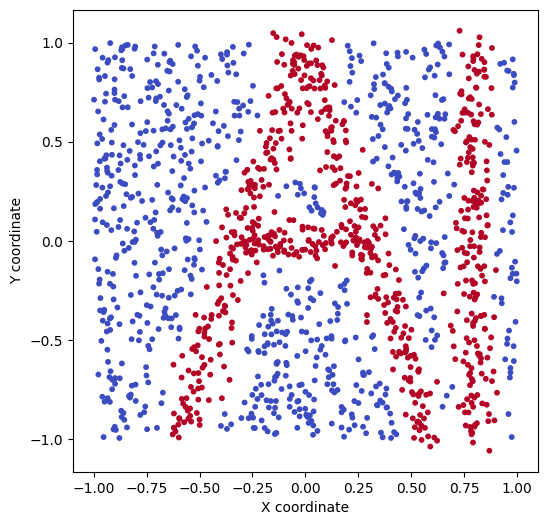

In [3]:
#look at the data-
# הצגת הנתונים
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [5]:
# build the model
model = keras.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation=None) # Do the activation inside the loss function
])

In [6]:
# compile the model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.01),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [7]:
reduce_LR_on_platue = keras.callbacks.ReduceLROnPlateau(monitor='accuracy', patience=5, factor=0.5)
early_stoping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=15)

In [8]:
# train the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_test, y_test), callbacks = [reduce_LR_on_platue])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.5661 - loss: 0.6107 - val_accuracy: 0.6333 - val_loss: 0.4533 - learning_rate: 0.0100
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.4283 - val_accuracy: 0.8333 - val_loss: 0.3756 - learning_rate: 0.0100
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.3456 - val_accuracy: 0.8667 - val_loss: 0.3284 - learning_rate: 0.0100
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8131 - loss: 0.3521 - val_accuracy: 0.8533 - val_loss: 0.3065 - learning_rate: 0.0100
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.2797 - val_accuracy: 0.8533 - val_loss: 0.3059 - learning_rate: 0.0100
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8506 - loss: 0.2810 - val_accuracy: 0.8967 - val_loss: 0.2670 - learning_rate: 0.0100
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9081 - loss: 0.2585 - val_ac

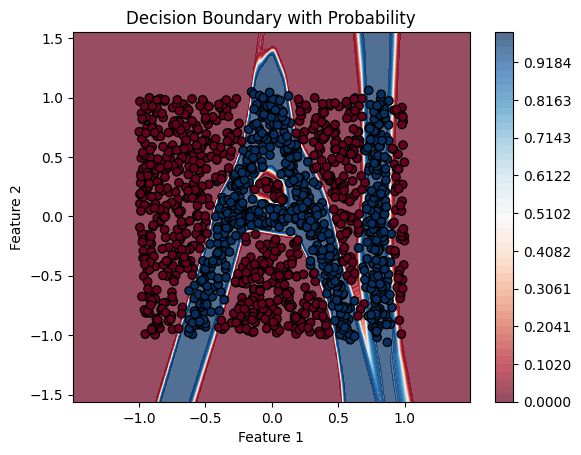

In [9]:
%run /content/PlotBoudary.ipynb
tf_plot_boundary(X,y,model)

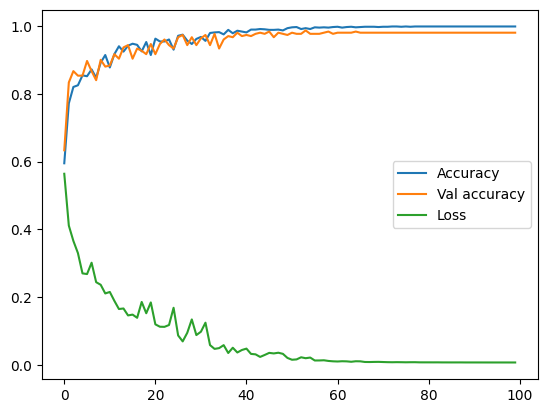

In [10]:
# plot history
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val accuracy")
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [11]:
#evalute